In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
import statsmodels

In [4]:
ad = pd.read_csv("https://github.com/CharlotteZepeda/DP-Mini-Project/raw/380cff8680d5152a2d7e076ef1abd7f49c45073c/adni.csv")

### Data Checking

In [5]:
ad.shape

(1851, 50)

In [6]:
#check number of datapoints in each category 
ad.groupby("DIAGNOSIS").size()

DIAGNOSIS
CN          617
Dementia    348
MCI         886
dtype: int64

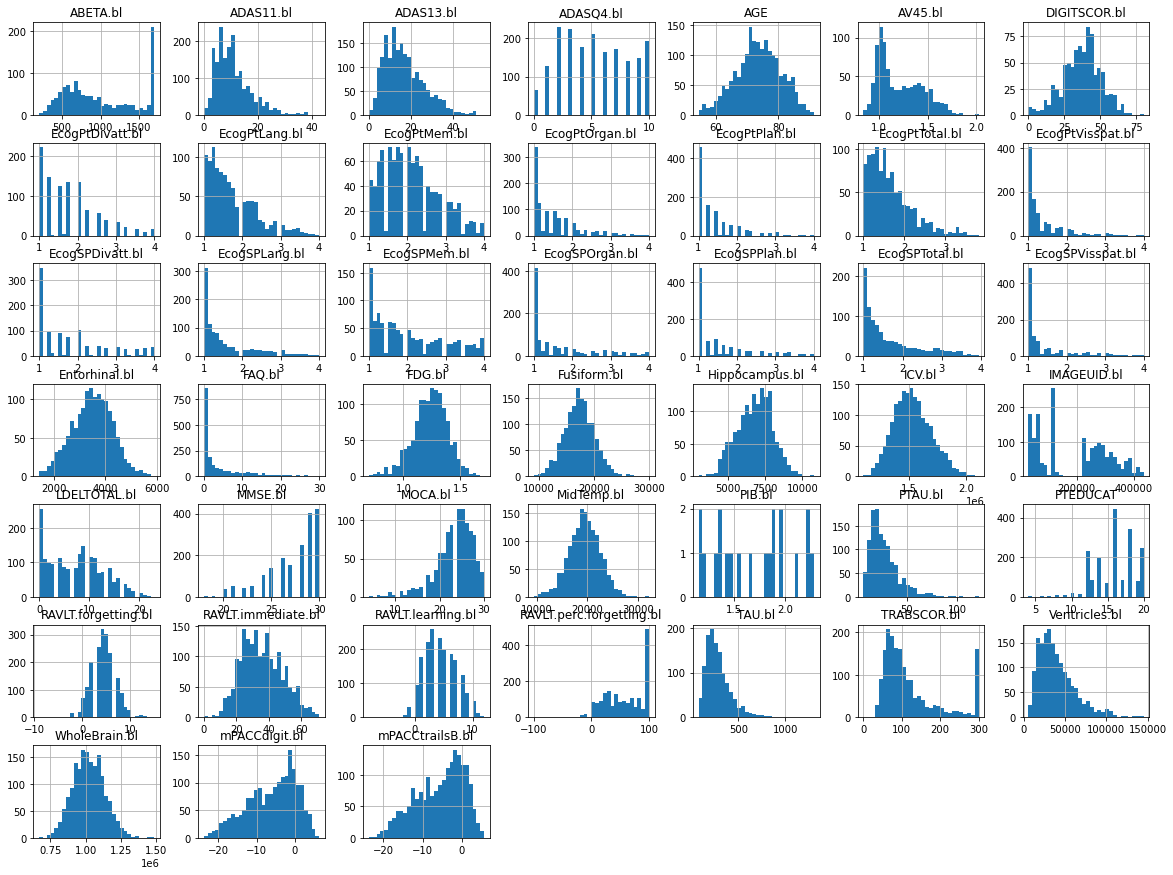

In [7]:
#check variable distributions
ad.hist(bins=30, figsize=(20,15))
plt.show()

The distributions of the data show that there are: <br> 1851 people with an uneven distribution of the outcome (CN:Dementia:MCI = 617:348:886). 


In [8]:
ad.describe()

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,EcogSPPlan.bl,EcogSPOrgan.bl,EcogSPDivatt.bl,EcogSPTotal.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PIB.bl,AV45.bl
count,1851.000000,1851.000000,1846.000000,1836.000000,1850.000000,1851.000000,1843.000000,1843.000000,1843.000000,1837.000000,...,1013.000000,981.000000,1002.000000,1021.000000,1215.000000,1215.000000,1215.000000,1301.000000,20.000000,891.000000
mean,73.603944,15.947596,10.792156,16.808448,5.184324,27.278768,35.772653,4.277265,4.300054,57.382509,...,1.547038,1.637802,1.812542,1.677406,980.085021,287.027086,27.641152,1.233852,1.698375,1.211917
std,7.199413,2.828228,6.539005,9.433675,2.944607,2.665917,12.641034,2.779961,2.500496,34.578994,...,0.771411,0.848796,0.907289,0.719877,457.557491,132.813700,14.603251,0.154266,0.372302,0.227395
min,54.400000,4.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-8.000000,-9.000000,-100.000000,...,1.000000,1.000000,1.000000,1.000000,199.000000,79.000000,7.000000,0.697264,1.155000,0.838537
25%,69.000000,14.000000,6.000000,10.000000,3.000000,26.000000,26.000000,2.000000,3.000000,28.571429,...,1.000000,1.000000,1.000000,1.108108,596.150000,193.350000,17.350000,1.141442,1.361875,1.020809
50%,73.600000,16.000000,9.330000,15.000000,5.000000,28.000000,35.000000,4.000000,4.000000,57.142857,...,1.200000,1.200000,1.500000,1.384615,854.200000,257.800000,24.150000,1.245474,1.743750,1.136146
75%,78.700000,18.000000,14.000000,22.330000,8.000000,29.000000,45.000000,6.000000,6.000000,100.000000,...,1.800000,2.000000,2.250000,2.051282,1395.500000,349.700000,33.975000,1.336828,1.956250,1.390537
max,91.400000,20.000000,42.670000,54.670000,10.000000,30.000000,71.000000,12.000000,15.000000,100.000000,...,4.000000,4.000000,4.000000,3.948718,1701.000000,1301.000000,121.000000,1.707168,2.282500,2.025560


In [9]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DIAGNOSIS                 1851 non-null   object 
 1   AGE                       1851 non-null   float64
 2   PTGENDER                  1851 non-null   object 
 3   PTEDUCAT                  1851 non-null   int64  
 4   PTETHCAT                  1851 non-null   object 
 5   PTRACCAT                  1851 non-null   object 
 6   PTMARRY                   1851 non-null   object 
 7   ADAS11.bl                 1846 non-null   float64
 8   ADAS13.bl                 1836 non-null   float64
 9   ADASQ4.bl                 1850 non-null   float64
 10  MMSE.bl                   1851 non-null   int64  
 11  RAVLT.immediate.bl        1843 non-null   float64
 12  RAVLT.learning.bl         1843 non-null   float64
 13  RAVLT.forgetting.bl       1843 non-null   float64
 14  RAVLT.pe

In [10]:
# Import label encoder 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'DIAGNOSIS'. 
ad["Diagnosis_Ordinal"]= label_encoder.fit_transform(ad["DIAGNOSIS"])
ad["PTGENDER_Ordinal"]= label_encoder.fit_transform(ad["PTGENDER"])
ad["PTMARRY_Ordinal"]= label_encoder.fit_transform(ad["PTMARRY"])
print(ad.head())

ad[["Diagnosis_Ordinal", "DIAGNOSIS", "PTGENDER_Ordinal", "PTGENDER", "PTMARRY_Ordinal", "PTMARRY"]].sample(20)

  DIAGNOSIS   AGE PTGENDER  PTEDUCAT         PTETHCAT PTRACCAT  PTMARRY  \
0        CN  74.3     Male        16  Not Hisp/Latino    White  Married   
1  Dementia  81.3     Male        18  Not Hisp/Latino    White  Married   
2       MCI  67.5     Male        10      Hisp/Latino    White  Married   
3        CN  73.7     Male        16  Not Hisp/Latino    White  Married   
4       MCI  80.4   Female        13  Not Hisp/Latino    White  Married   

   ADAS11.bl  ADAS13.bl  ADASQ4.bl  ...  EcogSPTotal.bl  ABETA.bl  TAU.bl  \
0      10.67      18.67        5.0  ...             NaN       NaN     NaN   
1      22.00      31.00        8.0  ...             NaN     741.5   239.7   
2      14.33      21.33        6.0  ...             NaN    1501.0   153.1   
3       8.67      14.67        4.0  ...             NaN     547.3   337.0   
4      18.67      25.67        7.0  ...             NaN       NaN     NaN   

   PTAU.bl    FDG.bl  PIB.bl  AV45.bl  Diagnosis_Ordinal  PTGENDER_Ordinal  \
0      N

,Diagnosis_Ordinal,DIAGNOSIS,PTGENDER_Ordinal,PTGENDER,PTMARRY_Ordinal,PTMARRY
1513,1,Dementia,1,Male,1,Married
179,1,Dementia,1,Male,1,Married
1034,1,Dementia,1,Male,1,Married
763,2,MCI,0,Female,2,Never married
875,2,MCI,0,Female,1,Married
1042,0,CN,1,Male,1,Married
1343,2,MCI,0,Female,1,Married
934,2,MCI,1,Male,1,Married
215,2,MCI,1,Male,1,Married
1147,2,MCI,0,Female,1,Married


In [11]:
import scipy as sp
import scipy.stats as stats
count = ad.count()

ad_stats = pd.DataFrame(count, columns = ["Non-NaN"])

min_vals = ad.min()
ad_stats['Min'] = min_vals

max_vals = ad.max()
ad_stats['Max'] = max_vals

mean_vals = ad.mean(skipna = True)
ad_stats['Mean'] = mean_vals

median_vals = ad.median(skipna=True)
ad_stats['Median'] = median_vals

ad_mode_sci = stats.mode(ad, nan_policy='omit')
ad_stats['Mode'] = ad_mode_sci[0][0]


ad_stats

,Non-NaN,Min,Max,Mean,Median,Mode
DIAGNOSIS,1851,CN,MCI,NaN,NaN,MCI
AGE,1851,54.4,91.4,7.360394e+01,7.360000e+01,71.4
PTGENDER,1851,Female,Male,NaN,NaN,Male
PTEDUCAT,1851,4,20,1.594760e+01,1.600000e+01,16
PTETHCAT,1851,Hisp/Latino,Unknown,NaN,NaN,Not Hisp/Latino
PTRACCAT,1851,Am Indian/Alaskan,White,NaN,NaN,White
PTMARRY,1851,Divorced,Widowed,NaN,NaN,Married
ADAS11.bl,1846,0,42.67,1.079216e+01,9.330000e+00,9
ADAS13.bl,1836,0,54.67,1.680845e+01,1.500000e+01,9
ADASQ4.bl,1850,0,10,5.184324e+00,5.000000e+00,2


In [12]:
# I wrote a function to drop variables with >40% NaN and uncommented the next cell because it was redundant

#Calculating how many variables have <40% NaN
def dropNaNCols(ad):
    for column in ad:
        nan_count = ad[column].isna().sum()
        if nan_count >= (len(ad)*0.4):
            ad = ad.drop(column, axis=1)
    return ad


In [13]:
ad_df = dropNaNCols(ad)

In [14]:
#replaced the 'Unknown' category with NAN and counted NANs across all the variables.

#ad_df=ad_df.replace('Unknown', np.nan)
#ad_df.isna().sum()

In [15]:
# Wrote a for-loop to replace the function I wrote earlier duh
# I think these tables are a lot clearer

# Performing chi2 tests
from scipy.stats import chi2_contingency

cols = ['PTGENDER','PTETHCAT','PTRACCAT','PTMARRY']
for i in cols:
    ct = pd.crosstab(ad_df[i], ad_df['DIAGNOSIS'], margins=True)
    stat, pvalue, dof, expected = chi2_contingency(ct)
    print('\n', '\n', ct)
    print('Chi2 pvalue =', pvalue)


 
 DIAGNOSIS   CN  Dementia  MCI   All
PTGENDER                           
Female     334       157  362   853
Male       283       191  524   998
All        617       348  886  1851
Chi2 pvalue = 0.00022661757321130107

 
 DIAGNOSIS         CN  Dementia  MCI   All
PTETHCAT                                 
Hisp/Latino       21        11   29    61
Not Hisp/Latino  592       334  852  1778
Unknown            4         3    5    12
All              617       348  886  1851
Chi2 pvalue = 0.999990050847327

 
 DIAGNOSIS           CN  Dementia  MCI   All
PTRACCAT                                   
Am Indian/Alaskan    1         0    2     3
Asian               11         7   14    32
Black               35        14   30    79
Hawaiian/Other PI    0         0    2     2
More than one        8         4    7    19
Unknown              1         0    3     4
White              561       323  828  1712
All                617       348  886  1851
Chi2 pvalue = 0.9725529280070867

 
 DIAGNOSIS 

### Chi Squared Test Conclusions
Chi Squared Test Results indicate : <br><br>
(i) Significant association between Gender and Diagnosis Category **p value < .001** <br>
(ii) Non-Significant association between ethnicity and Diagnosis Category **p value > 0.05** <br>
(iii) Non-Significant association between Race and Diagnosis Category **p value > 0.05** <br>
(iv) Significant association between Marital Status and Diagnosis Category **p value < .001**

### ANOVA Tests On Numerical Variables 

Basic Assumption of ANOVA is that **each group is drawn from a normal population**, therefore data should be rescaled (cell 24 shows not all variables are normally distributed)

### Column Rescaling
1. Rescale all the columns <br>
2. Make a deep copy <br>
3. Drop categorical variables from the deep copy<br>
4. Compute individual ANOVAs for each variable 

In [16]:
# Rescale the columns of the dataframe
# for each value v in a distribution of values V:
#    v = (v-mean(V)) / std(V)

def rescale(ad_df):
    for col_name in ad_df.loc[:,:]:
        values = []
        mean_V = ad_df.loc[:,col_name].mean(skipna = True)
        std_V = ad_df.loc[:,col_name].std(skipna = True)
        for v in ad_df.loc[:, col_name]:
            v = (v - mean_V) / std_V
            values.append(v)
        ad_df[col_name] = values
    return ad_df

In [17]:
# Make a deep copy of the data, holding the rescaled values:
cad_df = ad_df.copy()

cad_dfdropped = cad_df.drop(
    ['DIAGNOSIS','PTGENDER','PTETHCAT','PTRACCAT','PTMARRY', 'Diagnosis_Ordinal', 
     'PTMARRY_Ordinal', 'PTGENDER_Ordinal'], axis=1)

Added non-rescaled columns to the rescaled dataset in one go.

In [18]:
# Adding the categorical columns back

cad_df= rescale(cad_dfdropped)
non_rescaled_cat_cols = [ad_df['PTETHCAT'],ad_df['PTRACCAT'], 
                         ad_df['Diagnosis_Ordinal'], ad_df['PTMARRY_Ordinal'], ad_df['PTGENDER_Ordinal']]
cad_df=cad_df.join(non_rescaled_cat_cols)

In [19]:
#Loop for computing ANOVAS for numerical variables
from scipy.stats import f_oneway
cols = ['AGE','PTEDUCAT','ADAS11.bl','ADAS13.bl','ADASQ4.bl','MMSE.bl','RAVLT.immediate.bl','RAVLT.learning.bl','RAVLT.perc.forgetting.bl','LDELTOTAL.bl','TRABSCOR.bl','FAQ.bl','mPACCdigit.bl','mPACCtrailsB.bl','IMAGEUID.bl','Ventricles.bl','Hippocampus.bl','WholeBrain.bl','Entorhinal.bl','Fusiform.bl','MidTemp.bl','ICV.bl','ABETA.bl','TAU.bl','PTAU.bl','FDG.bl']
for i in cols:
    a1=cad_df[i][cad_df.Diagnosis_Ordinal==0]
    a2=cad_df[i][cad_df.Diagnosis_Ordinal==1]
    a3=cad_df[i][cad_df.Diagnosis_Ordinal==2]

    a1 = a1[np.logical_not(np.isnan(a1))]
    a2 = a2[np.logical_not(np.isnan(a2))]
    a3 = a3[np.logical_not(np.isnan(a3))]
    print(i) 
    print('Anova Test Result = ', f_oneway(a1, a2, a3))
    print('\n')

AGE
Anova Test Result =  F_onewayResult(statistic=8.83665219059515, pvalue=0.00015153936740062868)


PTEDUCAT
Anova Test Result =  F_onewayResult(statistic=23.121485599146336, pvalue=1.2079389667889303e-10)


ADAS11.bl
Anova Test Result =  F_onewayResult(statistic=904.2155333509479, pvalue=2.354203440239909e-274)


ADAS13.bl
Anova Test Result =  F_onewayResult(statistic=1105.6212640709487, pvalue=1.052235277e-315)


ADASQ4.bl
Anova Test Result =  F_onewayResult(statistic=851.1805776742857, pvalue=1.0434595266198145e-262)


MMSE.bl
Anova Test Result =  F_onewayResult(statistic=1435.8484994640044, pvalue=0.0)


RAVLT.immediate.bl
Anova Test Result =  F_onewayResult(statistic=590.3242404968256, pvalue=8.714124602234297e-199)


RAVLT.learning.bl
Anova Test Result =  F_onewayResult(statistic=329.85656732971677, pvalue=3.744887242592438e-123)


RAVLT.perc.forgetting.bl
Anova Test Result =  F_onewayResult(statistic=388.28189923981097, pvalue=2.465037022140986e-141)


LDELTOTAL.bl
Anova Test R

## ANOVA Test Conclusions


### Data Stratification 

In [20]:
ad_df

,DIAGNOSIS,AGE,PTGENDER,PTEDUCAT,PTETHCAT,PTRACCAT,PTMARRY,ADAS11.bl,ADAS13.bl,ADASQ4.bl,...,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,Diagnosis_Ordinal,PTGENDER_Ordinal,PTMARRY_Ordinal
0,CN,74.3,Male,16,Not Hisp/Latino,White,Married,10.67,18.67,5.0,...,16559.0,27936.0,1.984657e+06,NaN,NaN,NaN,1.369264,0,1,1
1,Dementia,81.3,Male,18,Not Hisp/Latino,White,Married,22.00,31.00,8.0,...,15506.0,18422.0,1.920691e+06,741.5,239.7,22.83,1.090790,1,1,1
2,MCI,67.5,Male,10,Hisp/Latino,White,Married,14.33,21.33,6.0,...,19036.0,19615.0,1.679445e+06,1501.0,153.1,13.29,NaN,2,1,1
3,CN,73.7,Male,16,Not Hisp/Latino,White,Married,8.67,14.67,4.0,...,24788.0,21614.0,1.640766e+06,547.3,337.0,33.43,1.297990,0,1,1
4,MCI,80.4,Female,13,Not Hisp/Latino,White,Married,18.67,25.67,7.0,...,17963.0,17802.0,1.485834e+06,NaN,NaN,NaN,NaN,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1846,CN,71.4,Male,14,Hisp/Latino,White,Married,12.00,15.00,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
1847,CN,65.8,Female,13,Not Hisp/Latino,White,Married,6.00,8.00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1848,MCI,76.7,Male,18,Not Hisp/Latino,White,Married,12.33,21.33,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1
1849,CN,72.6,Male,19,Not Hisp/Latino,White,Married,6.67,8.67,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1


In [21]:
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(ad_df, test_size=0.25, random_state=12, stratify=ad_df['Diagnosis_Ordinal']) 

# separate the 'DIAGNOSIS' column from training/testing data
train_X = train[train.columns[np.r_[1,3,7:len(ad_df.keys())-3, -2, -1]]]
test_X = test[test.columns[np.r_[1,3,7:len(ad_df.keys())-3,-2, -1]]]
train_Y = train['Diagnosis_Ordinal']
test_Y = test['Diagnosis_Ordinal']

### Data Imputation


In [22]:
# remove categorical variables for data imputation

train_X=pd.DataFrame(train_X)
train_X

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1778,58.7,18,9.67,11.67,2.0,29,53.0,5.0,2.0,16.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1573,62.9,12,20.00,30.00,9.0,21,23.0,1.0,5.0,100.000000,...,2176.0,11245.0,13801.0,1.420785e+06,587.9,363.4,36.63,0.924564,0,0
1578,79.6,16,28.00,40.00,10.0,23,16.0,-1.0,3.0,100.000000,...,2646.0,19798.0,19214.0,1.778052e+06,277.5,666.2,68.07,0.827834,1,1
189,76.9,16,11.33,18.33,7.0,27,19.0,1.0,4.0,100.000000,...,NaN,NaN,NaN,1.607161e+06,1701.0,257.6,24.04,1.270380,1,1
863,62.5,18,6.00,9.00,3.0,30,44.0,7.0,9.0,75.000000,...,3542.0,18432.0,23420.0,1.587815e+06,413.9,328.3,28.71,1.343290,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,63.4,19,12.00,17.00,5.0,29,36.0,5.0,6.0,54.545455,...,4178.0,14109.0,15867.0,1.280794e+06,487.9,246.2,24.13,1.169680,0,1
187,75.3,14,10.33,19.33,8.0,24,42.0,2.0,6.0,66.666667,...,2183.0,12290.0,14612.0,1.341721e+06,NaN,NaN,NaN,NaN,0,1
611,85.0,15,5.00,11.00,5.0,28,54.0,10.0,1.0,7.142857,...,2137.0,18125.0,17753.0,1.388421e+06,NaN,NaN,NaN,1.276030,0,4
1816,70.4,16,8.33,12.33,4.0,30,37.0,6.0,8.0,72.727273,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [23]:
from sklearn.impute import SimpleImputer
train_X_numeric = train_X.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
test_X_numeric = test_X.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_X_numeric)

# Here are the means per columns that are used for imputation
print('means per columns for imputation', imputer.statistics_)

# Performing the imputation on trainng set
train_X_numeric_tr=imputer.transform(train_X_numeric)

# and imputation on test set
test_X_numeric_tr=imputer.transform(test_X_numeric)
type(train_X_numeric)
train_X_numeric_tr=pd.DataFrame(train_X_numeric_tr, columns=train_X_numeric.columns, index = train_X_numeric.index)
test_X_numeric_tr=pd.DataFrame(test_X_numeric_tr, columns=test_X_numeric.columns, index = test_X_numeric.index)

means per columns for imputation [ 7.36009366e+01  1.59466859e+01  1.08010405e+01  1.68141715e+01
  5.18745494e+00  2.73134006e+01  3.58364689e+01  4.29088278e+00
  4.23227207e+00  5.66436571e+01  7.33718412e+00  1.19460282e+02
  4.07814761e+00 -5.91310674e+00 -5.62372335e+00  1.93348397e+05
  4.03832810e+04  6.78884636e+03  1.02081930e+06  3.48764168e+03
  1.73090850e+04  1.94826353e+04  1.53119150e+06  9.78462376e+02
  2.85107514e+02  2.74013971e+01  1.23199200e+00]


In [24]:
# Joining categocial variables with the imputed dataframe.

train_X_cat_cols = [train_X['PTGENDER_Ordinal'],train_X['PTMARRY_Ordinal']]
test_X_cat_cols = [test_X['PTGENDER_Ordinal'],test_X['PTMARRY_Ordinal']]
train_X=train_X_numeric_tr.join(train_X_cat_cols)
test_X=test_X_numeric_tr.join(test_X_cat_cols)

In [25]:
pd.DataFrame(test_X)

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1803,61.1,12.0,7.33,8.33,1.0,29.0,55.0,9.0,7.0,46.666667,...,3487.641682,17309.085009,19482.635283,1.531191e+06,978.462376,285.107514,27.401397,1.231992,1,2
1431,78.7,16.0,10.00,18.00,7.0,20.0,37.0,3.0,6.0,75.000000,...,2569.000000,14939.000000,14738.000000,1.401917e+06,978.462376,285.107514,27.401397,0.995194,0,0
271,86.6,13.0,21.67,34.67,10.0,21.0,20.0,1.0,4.0,100.000000,...,2382.000000,13644.000000,15568.000000,1.480431e+06,725.200000,444.800000,44.280000,1.296018,0,1
263,81.8,13.0,8.00,13.00,4.0,29.0,39.0,5.0,3.0,30.000000,...,3633.000000,13901.000000,16602.000000,1.448741e+06,1701.000000,368.600000,31.710000,1.292958,0,1
917,74.8,15.0,6.00,9.00,2.0,29.0,48.0,7.0,6.0,54.545455,...,3487.641682,17309.085009,19482.635283,1.390448e+06,982.600000,142.000000,11.780000,1.199310,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,74.3,18.0,5.33,8.33,2.0,27.0,29.0,2.0,5.0,71.428571,...,3277.000000,16735.000000,21214.000000,1.601605e+06,1308.000000,213.700000,18.620000,1.189966,1,1
183,71.5,16.0,6.67,11.67,4.0,28.0,36.0,6.0,8.0,72.727273,...,4310.000000,16398.000000,20063.000000,1.644781e+06,978.462376,285.107514,27.401397,1.290036,1,1
1596,83.0,18.0,7.00,9.00,2.0,25.0,39.0,9.0,6.0,50.000000,...,3309.000000,17564.000000,18185.000000,1.257899e+06,1701.000000,193.900000,16.840000,1.348888,0,4
1160,66.7,16.0,3.00,5.00,2.0,29.0,45.0,8.0,5.0,41.666667,...,5097.000000,26540.000000,19623.000000,1.611425e+06,1701.000000,179.600000,15.400000,1.336566,0,0


In [26]:
pd.DataFrame(train_X)

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1778,58.7,18.0,9.67,11.67,2.0,29.0,53.0,5.0,2.0,16.666667,...,3487.641682,17309.085009,19482.635283,1.531191e+06,978.462376,285.107514,27.401397,1.231992,0,1
1573,62.9,12.0,20.00,30.00,9.0,21.0,23.0,1.0,5.0,100.000000,...,2176.000000,11245.000000,13801.000000,1.420785e+06,587.900000,363.400000,36.630000,0.924564,0,0
1578,79.6,16.0,28.00,40.00,10.0,23.0,16.0,-1.0,3.0,100.000000,...,2646.000000,19798.000000,19214.000000,1.778052e+06,277.500000,666.200000,68.070000,0.827834,1,1
189,76.9,16.0,11.33,18.33,7.0,27.0,19.0,1.0,4.0,100.000000,...,3487.641682,17309.085009,19482.635283,1.607161e+06,1701.000000,257.600000,24.040000,1.270380,1,1
863,62.5,18.0,6.00,9.00,3.0,30.0,44.0,7.0,9.0,75.000000,...,3542.000000,18432.000000,23420.000000,1.587815e+06,413.900000,328.300000,28.710000,1.343290,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,63.4,19.0,12.00,17.00,5.0,29.0,36.0,5.0,6.0,54.545455,...,4178.000000,14109.000000,15867.000000,1.280794e+06,487.900000,246.200000,24.130000,1.169680,0,1
187,75.3,14.0,10.33,19.33,8.0,24.0,42.0,2.0,6.0,66.666667,...,2183.000000,12290.000000,14612.000000,1.341721e+06,978.462376,285.107514,27.401397,1.231992,0,1
611,85.0,15.0,5.00,11.00,5.0,28.0,54.0,10.0,1.0,7.142857,...,2137.000000,18125.000000,17753.000000,1.388421e+06,978.462376,285.107514,27.401397,1.276030,0,4
1816,70.4,16.0,8.33,12.33,4.0,30.0,37.0,6.0,8.0,72.727273,...,3487.641682,17309.085009,19482.635283,1.531191e+06,978.462376,285.107514,27.401397,1.231992,0,1


# Building and evaluation predictive models on training set, and testing on test set

### We'll use cross validation to look also for good values for the model's hyperparameters.

In [27]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier()
dt_a = dt.fit(train_X, train_Y)
scores=cross_val_score(dt_a, train_X, train_Y, scoring='accuracy', cv=10)
print('Acuracy on the 10 folds', scores)
print('and their mean', np.mean(scores))

Acuracy on the 10 folds [0.84892086 0.85611511 0.85611511 0.82014388 0.88489209 0.85611511
 0.87769784 0.81294964 0.79710145 0.81884058]
and their mean 0.8428891669273277


In [28]:
featureImportanceA = []

for name, importance in zip(train_X.keys(), dt.feature_importances_):
    featureImportanceA.append([name,importance])
   
featureImportanceA = pd.DataFrame(featureImportanceA, columns=['Name', 'Importance'])
featureImportanceA

,Name,Importance
0,AGE,0.016266
1,PTEDUCAT,0.005524
2,ADAS11.bl,0.004878
3,ADAS13.bl,0.016301
4,ADASQ4.bl,0.006301
5,MMSE.bl,0.028387
6,RAVLT.immediate.bl,0.009155
7,RAVLT.learning.bl,0.007372
8,RAVLT.forgetting.bl,0.005595
9,RAVLT.perc.forgetting.bl,0.004794


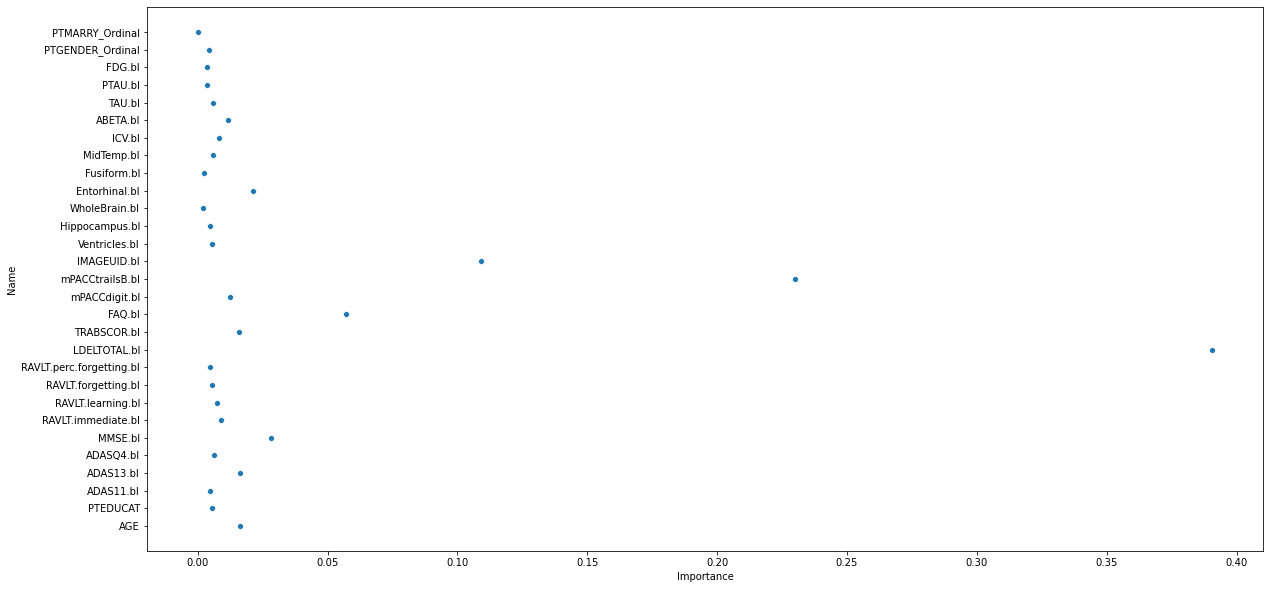

In [29]:
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Importance", y="Name", data=featureImportanceA, ax=ax);

In [30]:
# in the previous construction of the decision tree, the hyperparameters (such as depth, split criterion, etc) were default values
# lets try other values, for instance 3 levels:
dt.max_depth=6
scores=cross_val_score(dt, train_X, train_Y, scoring='accuracy', cv=10)
print('acuracy on the 10 folds of CV', scores)
print('and their mean', np.mean(scores)) # we see performance improved

acuracy on the 10 folds of CV [0.89928058 0.89208633 0.87769784 0.87769784 0.91366906 0.8705036
 0.88489209 0.86330935 0.89130435 0.8115942 ]
and their mean 0.8782035241372121


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]} ]

grid_search = GridSearchCV(dt, param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(train_X, train_Y)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'max_depth': 5}
best estimator DecisionTreeClassifier(max_depth=5)


In [32]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.8205765822124909 {'max_depth': 2}
0.8198571577520593 {'max_depth': 3}
0.8580492128036703 {'max_depth': 4}
0.8803982900636014 {'max_depth': 5}
0.8767594619956209 {'max_depth': 6}
0.8652434574079866 {'max_depth': 7}
0.8565790845584402 {'max_depth': 8}
0.852288603899489 {'max_depth': 9}
0.8443384422896466 {'max_depth': 10}
0.8493848399541237 {'max_depth': 11}
0.8457825044312376 {'max_depth': 12}


In [33]:
#Comparison of different bagging ensemble methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score


DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(train_X, train_Y)

dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, train_X, train_Y, cv=k_folds)
    print(results.mean())

bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.8782919254658385
0.8724637681159418
0.8616770186335403


In [34]:
#Random Forest classifier

k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

max_feat = [4, 5, 6, 7, 8]
for i in max_feat:
    
    random_forest = RandomForestClassifier(n_estimators=500, max_features=i, random_state=12)
    random_forest.fit(train_X, train_Y)
    results = cross_val_score(random_forest, train_X, train_Y, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 4 estimators:
0.8674430641821946
Results for 5 estimators:
0.8724637681159418
Results for 6 estimators:
0.87175983436853
Results for 7 estimators:
0.8746480331262939
Results for 8 estimators:
0.875351966873706


In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_X, train_Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [36]:
# Estimating the Out-Of-Bag score

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(train_X, train_Y)
bag_clf.oob_score_

0.8731988472622478

In [37]:
pd.DataFrame(train_X)

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1778,58.7,18.0,9.67,11.67,2.0,29.0,53.0,5.0,2.0,16.666667,...,3487.641682,17309.085009,19482.635283,1.531191e+06,978.462376,285.107514,27.401397,1.231992,0,1
1573,62.9,12.0,20.00,30.00,9.0,21.0,23.0,1.0,5.0,100.000000,...,2176.000000,11245.000000,13801.000000,1.420785e+06,587.900000,363.400000,36.630000,0.924564,0,0
1578,79.6,16.0,28.00,40.00,10.0,23.0,16.0,-1.0,3.0,100.000000,...,2646.000000,19798.000000,19214.000000,1.778052e+06,277.500000,666.200000,68.070000,0.827834,1,1
189,76.9,16.0,11.33,18.33,7.0,27.0,19.0,1.0,4.0,100.000000,...,3487.641682,17309.085009,19482.635283,1.607161e+06,1701.000000,257.600000,24.040000,1.270380,1,1
863,62.5,18.0,6.00,9.00,3.0,30.0,44.0,7.0,9.0,75.000000,...,3542.000000,18432.000000,23420.000000,1.587815e+06,413.900000,328.300000,28.710000,1.343290,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386,63.4,19.0,12.00,17.00,5.0,29.0,36.0,5.0,6.0,54.545455,...,4178.000000,14109.000000,15867.000000,1.280794e+06,487.900000,246.200000,24.130000,1.169680,0,1
187,75.3,14.0,10.33,19.33,8.0,24.0,42.0,2.0,6.0,66.666667,...,2183.000000,12290.000000,14612.000000,1.341721e+06,978.462376,285.107514,27.401397,1.231992,0,1
611,85.0,15.0,5.00,11.00,5.0,28.0,54.0,10.0,1.0,7.142857,...,2137.000000,18125.000000,17753.000000,1.388421e+06,978.462376,285.107514,27.401397,1.276030,0,4
1816,70.4,16.0,8.33,12.33,4.0,30.0,37.0,6.0,8.0,72.727273,...,3487.641682,17309.085009,19482.635283,1.531191e+06,978.462376,285.107514,27.401397,1.231992,0,1


In [38]:
test_X

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1803,61.1,12.0,7.33,8.33,1.0,29.0,55.0,9.0,7.0,46.666667,...,3487.641682,17309.085009,19482.635283,1.531191e+06,978.462376,285.107514,27.401397,1.231992,1,2
1431,78.7,16.0,10.00,18.00,7.0,20.0,37.0,3.0,6.0,75.000000,...,2569.000000,14939.000000,14738.000000,1.401917e+06,978.462376,285.107514,27.401397,0.995194,0,0
271,86.6,13.0,21.67,34.67,10.0,21.0,20.0,1.0,4.0,100.000000,...,2382.000000,13644.000000,15568.000000,1.480431e+06,725.200000,444.800000,44.280000,1.296018,0,1
263,81.8,13.0,8.00,13.00,4.0,29.0,39.0,5.0,3.0,30.000000,...,3633.000000,13901.000000,16602.000000,1.448741e+06,1701.000000,368.600000,31.710000,1.292958,0,1
917,74.8,15.0,6.00,9.00,2.0,29.0,48.0,7.0,6.0,54.545455,...,3487.641682,17309.085009,19482.635283,1.390448e+06,982.600000,142.000000,11.780000,1.199310,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,74.3,18.0,5.33,8.33,2.0,27.0,29.0,2.0,5.0,71.428571,...,3277.000000,16735.000000,21214.000000,1.601605e+06,1308.000000,213.700000,18.620000,1.189966,1,1
183,71.5,16.0,6.67,11.67,4.0,28.0,36.0,6.0,8.0,72.727273,...,4310.000000,16398.000000,20063.000000,1.644781e+06,978.462376,285.107514,27.401397,1.290036,1,1
1596,83.0,18.0,7.00,9.00,2.0,25.0,39.0,9.0,6.0,50.000000,...,3309.000000,17564.000000,18185.000000,1.257899e+06,1701.000000,193.900000,16.840000,1.348888,0,4
1160,66.7,16.0,3.00,5.00,2.0,29.0,45.0,8.0,5.0,41.666667,...,5097.000000,26540.000000,19623.000000,1.611425e+06,1701.000000,179.600000,15.400000,1.336566,0,0


In [39]:
# The AdaBoost Model

k_folds = KFold(n_splits=10, random_state=12, shuffle=True)
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=8), n_estimators=50, algorithm="SAMME", learning_rate=0.8)
ada_boost.fit(train_X, train_Y)

pred_Y=ada_boost.predict(test_X)

results = cross_val_score(ada_boost, train_X, train_Y, cv=k_folds)
print("Results for {} estimators:".format(50))
print(results.mean())

Results for 50 estimators:
0.865968095089146


In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#best_dt=grid_search.best_estimator_


print('confusion matrix \n', confusion_matrix(test_Y, pred_Y))
print('\n accuracy', accuracy_score(test_Y, pred_Y))
print('\n precision', precision_score(test_Y, pred_Y, average='macro'))
print('\n recall', recall_score(test_Y, pred_Y, average='macro'))
print('\n f1', f1_score(test_Y, pred_Y, average='macro'))

confusion matrix 
 [[134   0  20]
 [  0  76  11]
 [  8  15 199]]

 accuracy 0.8833693304535637

 precision 0.8813480661000562

 recall 0.8800298283056903

 f1 0.879956321042132


  # (B) CN vs Dementia

In [41]:
# Dropping the MCI rows

index_names_b = ad[ ad['DIAGNOSIS'] == 'MCI' ].index 
  
# drop these row indexes 
# from dataFrame 
adNoMCI = ad.drop(index_names_b) 

# Checking the new data frame
adNoMCI.groupby("DIAGNOSIS").size()

DIAGNOSIS
CN          617
Dementia    348
dtype: int64

In [42]:
adNoMCI=adNoMCI.drop(["DIAGNOSIS", "PTGENDER", "PTMARRY", "PTRACCAT", "PTRACCAT", "PTETHCAT"], axis=1)
adNoMCI = dropNaNCols(adNoMCI)
adNoMCI

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,Diagnosis_Ordinal,PTGENDER_Ordinal,PTMARRY_Ordinal
0,74.3,16,10.67,18.67,5.0,28,44.0,4.0,6.0,54.545455,...,16559.0,27936.0,1.984657e+06,NaN,NaN,NaN,1.369264,0,1,1
1,81.3,18,22.00,31.00,8.0,20,22.0,1.0,4.0,100.000000,...,15506.0,18422.0,1.920691e+06,741.5,239.7,22.83,1.090790,1,1,1
3,73.7,16,8.67,14.67,4.0,29,37.0,4.0,4.0,44.444444,...,24788.0,21614.0,1.640766e+06,547.3,337.0,33.43,1.297990,0,1,1
5,75.4,10,27.33,40.33,10.0,20,17.0,2.0,3.0,75.000000,...,12063.0,15374.0,1.353519e+06,NaN,NaN,NaN,NaN,1,1,1
6,84.5,18,5.00,7.00,2.0,28,51.0,7.0,3.0,25.000000,...,14043.0,20076.0,1.396068e+06,1701.0,440.2,37.51,1.276278,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,62.0,20,13.67,19.67,4.0,28,53.0,9.0,1.0,7.142857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1846,71.4,14,12.00,15.00,2.0,29,38.0,4.0,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1
1847,65.8,13,6.00,8.00,1.0,27,65.0,7.0,15.0,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1849,72.6,19,6.67,8.67,0.0,30,57.0,8.0,4.0,28.571429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1


In [43]:
# Stratification 

from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(adNoMCI, test_size=0.25, random_state=12, stratify=adNoMCI['Diagnosis_Ordinal']) 

# separate the 'Diagnosis_Ordinal' column from training/testing data
train_X_b = train[train.columns[np.r_[0:len(adNoMCI.keys())-3, -2, -1]]]
test_X_b = test[test.columns[np.r_[0:len(adNoMCI.keys())-3,-2, -1]]]
train_Y_b = train['Diagnosis_Ordinal']
test_Y_b = test['Diagnosis_Ordinal']

In [44]:
train_X_b

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1537,69.3,12,6.00,7.00,1.0,28,48.0,6.0,4.0,30.769231,...,3520.0,17187.0,19807.0,1.278473e+06,1701.0,215.5,17.18,1.357068,0,1
1647,65.1,20,7.00,16.00,7.0,29,36.0,3.0,2.0,25.000000,...,3508.0,15214.0,22959.0,1.370208e+06,NaN,NaN,NaN,1.054252,0,2
770,79.5,13,17.33,29.33,10.0,25,23.0,3.0,5.0,100.000000,...,NaN,NaN,NaN,1.663636e+06,NaN,NaN,NaN,1.205728,0,1
162,65.9,16,22.00,34.00,9.0,26,22.0,4.0,5.0,83.333333,...,3531.0,19294.0,17448.0,1.847418e+06,642.9,416.9,40.28,0.977062,1,1
238,76.3,16,3.33,4.33,1.0,29,52.0,6.0,5.0,41.666667,...,4133.0,20208.0,20341.0,1.599489e+06,1006.0,107.3,10.57,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,64.2,15,8.67,15.67,7.0,24,24.0,2.0,6.0,100.000000,...,NaN,NaN,NaN,1.694433e+06,651.2,459.5,53.53,NaN,1,1
1780,67.9,12,10.67,15.67,4.0,29,29.0,5.0,3.0,37.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1490,79.6,13,19.00,29.00,8.0,26,25.0,3.0,4.0,66.666667,...,3178.0,14590.0,15354.0,1.379459e+06,532.9,379.1,37.91,0.982504,0,1
1795,65.4,18,8.67,12.67,3.0,30,47.0,10.0,10.0,71.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [45]:
#data_imputation 
from sklearn.impute import SimpleImputer
train_X_b_numeric = train_X_b.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
test_X_b_numeric = test_X_b.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_X_b_numeric)
#here are the means per columns that are used for imputation
print('means per columns for imputation', imputer.statistics_)
# now perform the imputation on trainng set
train_X_b_numerictr =imputer.transform(train_X_b_numeric)

# and imputation on test set
test_X_b_numerictr=imputer.transform(test_X_b_numeric)

train_X_b_numerictr=pd.DataFrame(train_X_b_numerictr, columns=train_X_b_numeric.columns, index = train_X_b_numeric.index)
test_X_b_numerictr=pd.DataFrame(test_X_b_numerictr, columns=test_X_b_numeric.columns, index = test_X_b_numeric.index)


means per columns for imputation [ 7.38665284e+01  1.60373444e+01  1.12870139e+01  1.70619860e+01
  4.90443213e+00  2.70110650e+01  3.72158774e+01  4.47910864e+00
  3.93732591e+00  5.36808943e+01  8.86685160e+00  1.19674385e+02
  4.86546463e+00 -5.53784093e+00 -5.29359906e+00  2.04623481e+05
  3.95865894e+04  6.82516904e+03  1.01214905e+06  3.47642173e+03
  1.71190055e+04  1.93223444e+04  1.51961746e+06  1.00348307e+03
  2.83590067e+02  2.70269042e+01  1.21954845e+00]


In [46]:
# readding categorical variables with the imputed dataframe.

train_Xb_cat_cols = [train_X_b['PTGENDER_Ordinal'],train_X_b['PTMARRY_Ordinal']]
test_Xb_cat_cols = [test_X_b['PTGENDER_Ordinal'],test_X_b['PTMARRY_Ordinal']]
train_X_b=train_X_b_numerictr.join(train_Xb_cat_cols)
test_X_b=test_X_b_numerictr.join(test_Xb_cat_cols)

## Building a Model 

In [47]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier()
dt.fit(train_X_b, train_Y_b)
scores=cross_val_score(dt, train_X_b, train_Y_b, scoring='accuracy', cv=10)
print('Acuracy on the 10 folds', scores)
print('and their mean', np.mean(scores))

Acuracy on the 10 folds [0.98630137 1.         0.98630137 0.97222222 0.98611111 0.97222222
 0.98611111 1.         1.         0.98611111]
and their mean 0.9875380517503805


In [48]:
featureImportance = []

for name, importance in zip(adNoMCI.keys(), dt.feature_importances_):
    featureImportance.append([name,importance])
   
featureImportance = pd.DataFrame(featureImportance, columns=['Name', 'Importance'])
featureImportance

,Name,Importance
0,AGE,0.000000
1,PTEDUCAT,0.003997
2,ADAS11.bl,0.005973
3,ADAS13.bl,0.002998
4,ADASQ4.bl,0.000000
5,MMSE.bl,0.000000
6,RAVLT.immediate.bl,0.000000
7,RAVLT.learning.bl,0.000000
8,RAVLT.forgetting.bl,0.000000
9,RAVLT.perc.forgetting.bl,0.000000


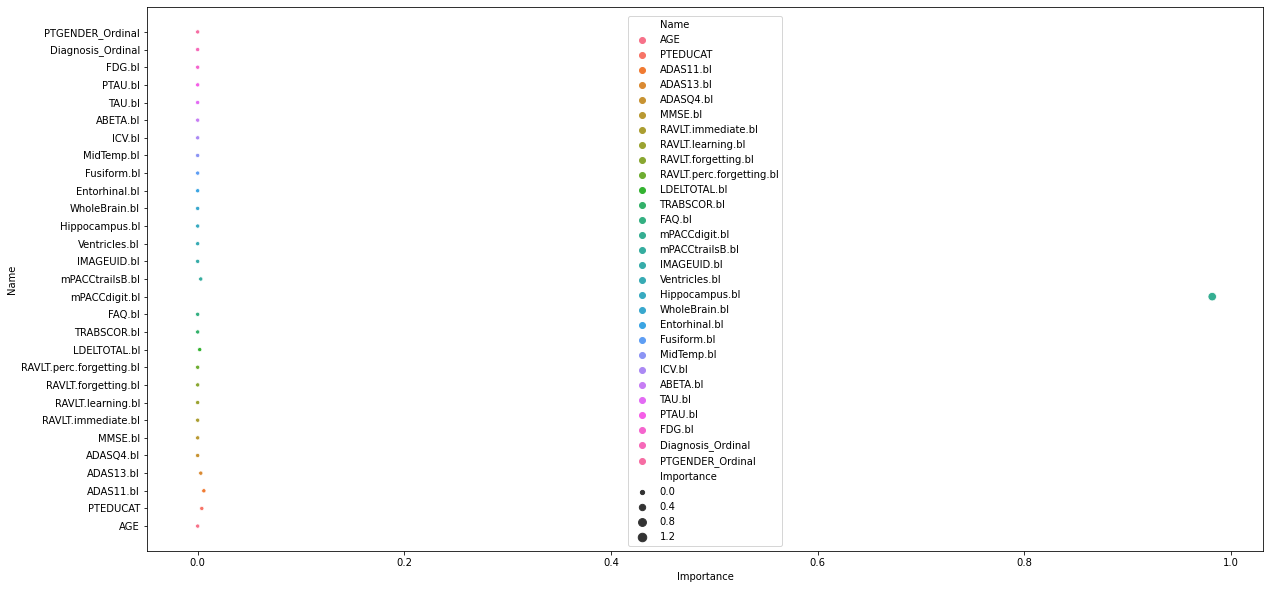

In [49]:
import seaborn as sns
f, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Importance", y="Name", hue="Name", size="Importance" ,data=featureImportance, ax=ax);

In [50]:
# in the previous construction of the decision tree, the hyperparameters (such as depth, split criterion, etc) were default values
# lets try other values, for instance 3 levels:
dt.max_depth=6
scores=cross_val_score(dt, train_X_b, train_Y_b, scoring='accuracy', cv=10)
print('acuracy on the 10 folds of CV', scores)
print('and their mean', np.mean(scores)) # we see performance improved

acuracy on the 10 folds of CV [0.98630137 0.98630137 0.98630137 0.97222222 1.         0.98611111
 0.98611111 0.98611111 1.         0.98611111]
and their mean 0.9875570776255707


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]} ]

grid_search_b = GridSearchCV(dt, param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

grid_search_b.fit(train_X_b, train_Y_b)
print('best parameter values', grid_search_b.best_params_)
print('best estimator', grid_search_b.best_estimator_)

best parameter values {'max_depth': 5}
best estimator DecisionTreeClassifier(max_depth=5)


In [52]:
cvres = grid_search_b.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.9903158295281582 {'max_depth': 2}
0.9889269406392694 {'max_depth': 3}
0.9903158295281582 {'max_depth': 4}
0.9917047184170471 {'max_depth': 5}
0.9917047184170471 {'max_depth': 6}
0.9903158295281582 {'max_depth': 7}
0.987576103500761 {'max_depth': 8}
0.9889269406392694 {'max_depth': 9}
0.9903158295281582 {'max_depth': 10}
0.9903158295281582 {'max_depth': 11}
0.9903158295281582 {'max_depth': 12}


In [53]:
#Comparison of different bagging ensemble methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score


DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(train_X_b, train_Y_b)

dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, train_X_b, train_Y_b, cv=k_folds)
    print(results.mean())

#bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)


0.9944444444444445
0.9958333333333333
0.9972222222222221


In [54]:
#Random Forest classifier and feature importance. 
k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

max_feat = [2, 3, 4, 5]
for i in max_feat:
    
    random_forest = RandomForestClassifier(n_estimators=500, max_features=i, random_state=12)
    random_forest.fit(train_X_b, train_Y_b)
    results = cross_val_score(random_forest, train_X_b, train_Y_b, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 2 estimators:
0.9972222222222221
Results for 3 estimators:
0.9958333333333333
Results for 4 estimators:
0.9958333333333333
Results for 5 estimators:
0.9958333333333333


In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_X_b, train_Y_b)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [56]:
bag_clf = BaggingClassifier(
... DecisionTreeClassifier(), n_estimators=500,
... bootstrap=True, n_jobs=-1, oob_score=True)
...
>>> bag_clf.fit(train_X_b, train_Y_b)
>>> bag_clf.oob_score_


0.9930843706777317

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {"base_estimator__criterion" : ["gini", "entropy"],
  'n_estimators': [10, 20, 50, 100],
  'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
 ]

grid_search_b = GridSearchCV(ada_boost, param_grid, cv=5,
 scoring='accuracy',
return_train_score=True)
grid_search_b.fit(train_X_b, train_Y_b)
grid_search_b.best_params_

{'base_estimator__criterion': 'gini', 'learning_rate': 0.3, 'n_estimators': 50}

In [58]:
# AdaBoost

k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

num_estimators = [10, 20, 50, 100]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=i, algorithm="SAMME", learning_rate=0.1)
    results = cross_val_score(ada_boost, train_X_b, train_Y_b, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 10 estimators:
0.9888888888888887
Results for 20 estimators:
0.9888888888888887
Results for 50 estimators:
0.9874999999999998
Results for 100 estimators:
0.9874999999999998


In [59]:
# now we evaluate the best model on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

best_abc1=grid_search_b.best_estimator_
pred_Y_b=best_abc1.predict(test_X_b)

acc_B = accuracy_score(test_Y_b, pred_Y_b)
print('confusion matrix \n', confusion_matrix(test_Y_b, pred_Y_b))
print('\n accuracy', acc_B)
print('\n precision', precision_score(test_Y_b, pred_Y_b))
print('\n recall', recall_score(test_Y_b, pred_Y_b))
print('\n f1', f1_score(test_Y_b, pred_Y_b))

confusion matrix 
 [[154   1]
 [  0  87]]

 accuracy 0.9958677685950413

 precision 0.9886363636363636

 recall 1.0

 f1 0.9942857142857142


# (c) MCI vs Dementia

In [61]:
# Dropping the CN rows

index_names = ad_df[ ad_df['DIAGNOSIS'] == 'CN' ].index 
  
# drop these row indexes 
# from dataFrame 
adNoCN = ad_df.drop(index_names) 

# Checking the new data frame
adNoCN.groupby("DIAGNOSIS").size()

DIAGNOSIS
Dementia    348
MCI         886
dtype: int64

In [62]:
cols = ['PTGENDER_Ordinal','PTETHCAT','PTRACCAT','PTMARRY_Ordinal']
for i in cols:
    ct = pd.crosstab(adNoCN[i], adNoCN['Diagnosis_Ordinal'], margins=True)
    stat, pvalue, dof, expected = chi2_contingency(ct)
    print('\n', '\n', ct)
    print('Chi2 pvalue =', pvalue)


 
 Diagnosis_Ordinal    1    2   All
PTGENDER_Ordinal                 
0                  157  362   519
1                  191  524   715
All                348  886  1234
Chi2 pvalue = 0.761817997722934

 
 Diagnosis_Ordinal    1    2   All
PTETHCAT                         
Hisp/Latino         11   29    40
Not Hisp/Latino    334  852  1186
Unknown              3    5     8
All                348  886  1234
Chi2 pvalue = 0.9992016236372746

 
 Diagnosis_Ordinal    1    2   All
PTRACCAT                         
Am Indian/Alaskan    0    2     2
Asian                7   14    21
Black               14   30    44
Hawaiian/Other PI    0    2     2
More than one        4    7    11
Unknown              0    3     3
White              323  828  1151
All                348  886  1234
Chi2 pvalue = 0.9971041072227714

 
 Diagnosis_Ordinal    1    2   All
PTMARRY_Ordinal                  
0                   14   82    96
1                  288  684   972
2                   10   22    32
3 

In [63]:
adNoCN=adNoCN.drop(["DIAGNOSIS","PTGENDER", "PTMARRY", "PTRACCAT", "PTRACCAT", "PTETHCAT"], axis=1)
adNoCN = dropNaNCols(adNoCN)

In [64]:
adNoCN = adNoCN.copy()
adNoCNdropped = adNoCN.drop(['Diagnosis_Ordinal','PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)

In [65]:
adNoCN_rescaled= rescale(adNoCNdropped)
non_rescaled_cat_cols1 = [adNoCN['PTGENDER_Ordinal'],adNoCN['Diagnosis_Ordinal'],adNoCN['PTMARRY_Ordinal']]
adNoCN_rescaled=adNoCN_rescaled.join(non_rescaled_cat_cols1)

In [66]:
adNoCN_num= adNoCN_rescaled.select_dtypes(include=[np.number])

#cols = ['AGE','PTEDUCAT','ADAS11.bl','ADAS13.bl','ADASQ4.bl','MMSE.bl','RAVLT.immediate.bl','RAVLT.learning.bl','RAVLT.perc.forgetting.bl','LDELTOTAL.bl','TRABSCOR.bl','FAQ.bl','mPACCdigit.bl','mPACCtrailsB.bl','IMAGEUID.bl','Ventricles.bl','Hippocampus.bl','WholeBrain.bl','Entorhinal.bl','Fusiform.bl','MidTemp.bl','ICV.bl','ABETA.bl','TAU.bl','PTAU.bl','FDG.bl']
for i in adNoCN_num:

    a2=adNoCN_num[i][adNoCN.Diagnosis_Ordinal==1]
    a3=adNoCN_num[i][adNoCN.Diagnosis_Ordinal==2]

    a2 = a2[np.logical_not(np.isnan(a2))]
    a3 = a3[np.logical_not(np.isnan(a3))]
    print(i) 
    print('Anova Test Result = ', f_oneway(a2, a3))
    print('\n')

AGE
Anova Test Result =  F_onewayResult(statistic=15.296892860033205, pvalue=9.688056951279029e-05)


PTEDUCAT
Anova Test Result =  F_onewayResult(statistic=16.15696832263186, pvalue=6.184054675753019e-05)


ADAS11.bl
Anova Test Result =  F_onewayResult(statistic=792.893112977245, pvalue=5.023713612283742e-135)


ADAS13.bl
Anova Test Result =  F_onewayResult(statistic=867.5648903367443, pvalue=1.7698980164334513e-144)


ADASQ4.bl
Anova Test Result =  F_onewayResult(statistic=466.6181703270772, pvalue=5.16884868885902e-88)


MMSE.bl
Anova Test Result =  F_onewayResult(statistic=1373.4419934767016, pvalue=1.3443590976582773e-202)


RAVLT.immediate.bl
Anova Test Result =  F_onewayResult(statistic=339.73350740095435, pvalue=3.619876862985996e-67)


RAVLT.learning.bl
Anova Test Result =  F_onewayResult(statistic=223.60113371615597, pvalue=1.4291471454467529e-46)


RAVLT.forgetting.bl
Anova Test Result =  F_onewayResult(statistic=0.5940011659798725, pvalue=0.4410243040700482)


RAVLT.perc.fo

C:\Users\Anna\anaconda3\lib\site-packages\scipy\stats\stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [67]:
import scipy as sp
import scipy.stats as stats
count = adNoCN.count()

ad_stats = pd.DataFrame(count, columns = ["Non-NaN"])

min_vals = adNoCN.min()
ad_stats['Min'] = min_vals

max_vals = adNoCN.max()
ad_stats['Max'] = max_vals

mean_vals = adNoCN.mean(skipna = True)
ad_stats['Mean'] = mean_vals

median_vals = adNoCN.median(skipna=True)
ad_stats['Median'] = median_vals

ad_mode_sci = stats.mode(adNoCN, nan_policy='omit')
ad_stats['Mode'] = ad_mode_sci[0][0]


ad_stats

,Non-NaN,Min,Max,Mean,Median,Mode
AGE,1234,5.440000e+01,9.140000e+01,7.357553e+01,7.400000e+01,7.430000e+01
PTEDUCAT,1234,4.000000e+00,2.000000e+01,1.569935e+01,1.600000e+01,1.600000e+01
ADAS11.bl,1231,1.000000e+00,4.267000e+01,1.295180e+01,1.167000e+01,9.000000e+00
ADAS13.bl,1222,3.000000e+00,5.467000e+01,2.032868e+01,1.900000e+01,1.800000e+01
ADASQ4.bl,1234,0.000000e+00,1.000000e+01,6.379254e+00,7.000000e+00,1.000000e+01
MMSE.bl,1234,1.800000e+01,3.000000e+01,2.636386e+01,2.700000e+01,2.900000e+01
RAVLT.immediate.bl,1230,0.000000e+00,6.800000e+01,3.106016e+01,2.900000e+01,2.700000e+01
RAVLT.learning.bl,1230,-4.000000e+00,1.200000e+01,3.454472e+00,3.000000e+00,3.000000e+00
RAVLT.forgetting.bl,1230,-4.000000e+00,1.300000e+01,4.575610e+00,5.000000e+00,4.000000e+00
RAVLT.perc.forgetting.bl,1225,-3.636364e+01,1.000000e+02,6.843905e+01,7.500000e+01,1.000000e+02


In [68]:
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(adNoCN, test_size=0.25, random_state=12, stratify=adNoCN['Diagnosis_Ordinal']) 

# separate the 'DIAGNOSIS' column from training/testing data
Xtrain = train[train.columns[np.r_[0:len(adNoCN.keys())-3, -2, -1]]]
Xtest = test[test.columns[np.r_[0:len(adNoCN.keys())-3,-2, -1]]]
Ytrain = train['Diagnosis_Ordinal']
Ytest = test['Diagnosis_Ordinal']

In [69]:
from sklearn.impute import SimpleImputer
Xtrain_numeric = Xtrain.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
Xtest_numeric = Xtest.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
imputer = SimpleImputer(strategy="mean")
imputer.fit(Xtrain_numeric)
#here are the means per columns that are used for imputation
print('means per columns for imputation', imputer.statistics_)
# now perform the imputation on trainng set
Xtrain_numeric_tr=imputer.transform(Xtrain_numeric)

# and imputation on test set
Xtest_numeric_tr=imputer.transform(Xtest_numeric)
type(Xtest_numeric)
Xtrain_numeric_tr=pd.DataFrame(Xtrain_numeric_tr, columns=Xtrain_numeric.columns, index = Xtrain_numeric.index)
Xtest_numeric_tr=pd.DataFrame(Xtest_numeric_tr, columns=Xtest_numeric.columns, index = Xtest_numeric.index)

means per columns for imputation [ 7.34492973e+01  1.56832432e+01  1.30567172e+01  2.04580262e+01
  6.36432432e+00  2.63848649e+01  3.07318132e+01  3.46796960e+00
  4.53420195e+00  6.83929347e+01  4.44155844e+00  1.40093679e+02
  5.99240781e+00 -8.89459422e+00 -8.45061346e+00  1.88375461e+05
  4.28806443e+04  6.52311811e+03  1.01601722e+06  3.31323624e+03
  1.70140886e+04  1.89936711e+04  1.53960795e+06  8.83082418e+02
  3.07964349e+02  3.01225903e+01  1.19644637e+00]


In [70]:
Xtrain_cat_cols = [Xtrain['PTGENDER_Ordinal'],Xtrain['PTMARRY_Ordinal']]
Xtest_cat_cols = [Xtest['PTGENDER_Ordinal'],Xtest['PTMARRY_Ordinal']]
Xtrain=Xtrain_numeric_tr.join(Xtrain_cat_cols)
Xtest=Xtest_numeric_tr.join(Xtest_cat_cols)


In [71]:
pd.DataFrame(Xtrain)

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
341,72.3,20.0,9.67,14.67,5.0,27.0,29.0,6.0,3.0,33.333333,...,3313.236242,17014.088591,18993.671141,1.912609e+06,1379.000000,192.000000,14.99000,1.226912,1,1
724,72.7,12.0,28.00,41.00,10.0,21.0,13.0,-2.0,0.0,68.392935,...,2162.000000,12149.000000,15073.000000,1.387571e+06,529.500000,481.800000,50.13000,1.196446,0,0
1506,77.2,12.0,9.00,19.00,9.0,28.0,29.0,3.0,3.0,42.857143,...,1490.000000,13330.000000,13345.000000,1.198984e+06,854.800000,287.400000,27.50000,1.113496,0,1
1251,61.9,12.0,13.00,18.00,5.0,27.0,35.0,5.0,7.0,100.000000,...,3237.000000,19458.000000,18739.000000,1.377424e+06,705.200000,675.600000,76.51000,1.292480,0,1
194,83.4,14.0,23.00,31.00,8.0,20.0,20.0,2.0,5.0,100.000000,...,3313.236242,17014.088591,18993.671141,1.539565e+06,883.082418,307.964349,30.12259,1.196446,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,65.7,19.0,4.00,7.00,3.0,30.0,41.0,4.0,3.0,30.000000,...,3842.000000,20002.000000,21767.000000,1.573205e+06,1701.000000,286.000000,23.48000,1.382406,1,1
1787,71.3,13.0,27.00,41.00,9.0,18.0,10.0,0.0,2.0,100.000000,...,3313.236242,17014.088591,18993.671141,1.539608e+06,883.082418,307.964349,30.12259,1.196446,0,4
1836,69.1,16.0,28.33,40.33,9.0,22.0,15.0,2.0,4.0,100.000000,...,3313.236242,17014.088591,18993.671141,1.539608e+06,883.082418,307.964349,30.12259,1.196446,0,1
1104,86.5,16.0,22.00,34.00,9.0,22.0,19.0,3.0,5.0,100.000000,...,2468.000000,13754.000000,17587.000000,1.464896e+06,556.400000,303.700000,32.08000,1.067936,0,4


In [72]:
pd.DataFrame(Xtest)

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1207,72.9,12.0,17.00,28.00,10.0,25.0,26.0,3.0,6.0,100.000000,...,2929.000000,14891.000000,18189.000000,1.477108e+06,456.800000,479.500000,46.42000,1.128164,0,4
868,72.7,14.0,8.00,15.00,7.0,26.0,25.0,0.0,1.0,25.000000,...,4414.000000,20086.000000,20622.000000,1.797380e+06,731.400000,230.300000,24.90000,1.101290,1,1
1197,76.2,12.0,9.00,15.00,6.0,30.0,32.0,2.0,6.0,85.714286,...,3406.000000,15884.000000,18830.000000,1.323653e+06,1595.000000,169.800000,15.94000,1.467002,0,1
524,68.1,12.0,17.33,29.33,10.0,26.0,24.0,1.0,5.0,100.000000,...,3373.000000,19460.000000,24773.000000,1.604923e+06,883.082418,307.964349,30.12259,1.196446,1,1
484,85.2,16.0,20.00,30.00,9.0,29.0,24.0,4.0,6.0,85.714286,...,2093.000000,12001.000000,13292.000000,1.576625e+06,883.082418,307.964349,30.12259,1.118170,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,61.9,16.0,14.00,20.00,6.0,23.0,20.0,2.0,4.0,80.000000,...,4357.000000,20829.000000,20797.000000,1.586743e+06,437.600000,453.400000,49.99000,1.139960,1,1
631,83.0,18.0,9.33,14.33,5.0,27.0,25.0,3.0,7.0,100.000000,...,3404.000000,13055.000000,17604.000000,1.591045e+06,883.082418,307.964349,30.12259,1.296588,1,1
1313,82.4,12.0,9.00,14.00,4.0,28.0,24.0,1.0,2.0,40.000000,...,3541.000000,17234.000000,18279.000000,1.342929e+06,495.800000,172.000000,16.72000,1.243830,1,1
348,68.4,20.0,7.67,10.67,1.0,27.0,50.0,8.0,1.0,7.692308,...,3001.000000,14080.000000,16070.000000,1.559067e+06,883.082418,307.964349,30.12259,0.874738,0,1


# Building and evaluation predictive models on training set, and testing on test set

In [73]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt = tree.DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)

scores=cross_val_score(dt, Xtrain, Ytrain, scoring='accuracy', cv=10)
print('Acuracy on the 10 folds', scores)
print('and their mean', np.mean(scores))



Acuracy on the 10 folds [0.88172043 0.90322581 0.83870968 0.88172043 0.86021505 0.90217391
 0.86956522 0.83695652 0.90217391 0.85869565]
and their mean 0.8735156615240769


In [74]:
for name, importance in zip(pd.DataFrame(test_X).keys(), dt.feature_importances_):
    print(name, importance)

AGE 0.034490563556235344
PTEDUCAT 0.014826227002518372
ADAS11.bl 0.021510458485021422
ADAS13.bl 0.0
ADASQ4.bl 0.0
MMSE.bl 0.029701197630809903
RAVLT.immediate.bl 0.002668720860453308
RAVLT.learning.bl 0.003632425615617001
RAVLT.forgetting.bl 0.008611670675748483
RAVLT.perc.forgetting.bl 0.020991548741792213
LDELTOTAL.bl 0.0
TRABSCOR.bl 0.011387086004012135
FAQ.bl 0.08406842444505548
mPACCdigit.bl 0.03392518579392377
mPACCtrailsB.bl 0.608559950906028
IMAGEUID.bl 0.020121765740830754
Ventricles.bl 0.015478580990629182
Hippocampus.bl 0.018211998114366208
WholeBrain.bl 0.01027846867209072
Entorhinal.bl 0.017600072121452304
Fusiform.bl 0.0012254330481673375
MidTemp.bl 0.010757975483255916
ICV.bl 0.008414056221917574
ABETA.bl 0.014197666878487935
TAU.bl 0.005070569634861283
PTAU.bl 0.004269953376725291
FDG.bl 0.0
PTGENDER_Ordinal 0.0
PTMARRY_Ordinal 0.0


In [75]:
Xtrain

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
341,72.3,20.0,9.67,14.67,5.0,27.0,29.0,6.0,3.0,33.333333,...,3313.236242,17014.088591,18993.671141,1.912609e+06,1379.000000,192.000000,14.99000,1.226912,1,1
724,72.7,12.0,28.00,41.00,10.0,21.0,13.0,-2.0,0.0,68.392935,...,2162.000000,12149.000000,15073.000000,1.387571e+06,529.500000,481.800000,50.13000,1.196446,0,0
1506,77.2,12.0,9.00,19.00,9.0,28.0,29.0,3.0,3.0,42.857143,...,1490.000000,13330.000000,13345.000000,1.198984e+06,854.800000,287.400000,27.50000,1.113496,0,1
1251,61.9,12.0,13.00,18.00,5.0,27.0,35.0,5.0,7.0,100.000000,...,3237.000000,19458.000000,18739.000000,1.377424e+06,705.200000,675.600000,76.51000,1.292480,0,1
194,83.4,14.0,23.00,31.00,8.0,20.0,20.0,2.0,5.0,100.000000,...,3313.236242,17014.088591,18993.671141,1.539565e+06,883.082418,307.964349,30.12259,1.196446,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,65.7,19.0,4.00,7.00,3.0,30.0,41.0,4.0,3.0,30.000000,...,3842.000000,20002.000000,21767.000000,1.573205e+06,1701.000000,286.000000,23.48000,1.382406,1,1
1787,71.3,13.0,27.00,41.00,9.0,18.0,10.0,0.0,2.0,100.000000,...,3313.236242,17014.088591,18993.671141,1.539608e+06,883.082418,307.964349,30.12259,1.196446,0,4
1836,69.1,16.0,28.33,40.33,9.0,22.0,15.0,2.0,4.0,100.000000,...,3313.236242,17014.088591,18993.671141,1.539608e+06,883.082418,307.964349,30.12259,1.196446,0,1
1104,86.5,16.0,22.00,34.00,9.0,22.0,19.0,3.0,5.0,100.000000,...,2468.000000,13754.000000,17587.000000,1.464896e+06,556.400000,303.700000,32.08000,1.067936,0,4


In [76]:
Xtest

,AGE,PTEDUCAT,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1207,72.9,12.0,17.00,28.00,10.0,25.0,26.0,3.0,6.0,100.000000,...,2929.000000,14891.000000,18189.000000,1.477108e+06,456.800000,479.500000,46.42000,1.128164,0,4
868,72.7,14.0,8.00,15.00,7.0,26.0,25.0,0.0,1.0,25.000000,...,4414.000000,20086.000000,20622.000000,1.797380e+06,731.400000,230.300000,24.90000,1.101290,1,1
1197,76.2,12.0,9.00,15.00,6.0,30.0,32.0,2.0,6.0,85.714286,...,3406.000000,15884.000000,18830.000000,1.323653e+06,1595.000000,169.800000,15.94000,1.467002,0,1
524,68.1,12.0,17.33,29.33,10.0,26.0,24.0,1.0,5.0,100.000000,...,3373.000000,19460.000000,24773.000000,1.604923e+06,883.082418,307.964349,30.12259,1.196446,1,1
484,85.2,16.0,20.00,30.00,9.0,29.0,24.0,4.0,6.0,85.714286,...,2093.000000,12001.000000,13292.000000,1.576625e+06,883.082418,307.964349,30.12259,1.118170,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,61.9,16.0,14.00,20.00,6.0,23.0,20.0,2.0,4.0,80.000000,...,4357.000000,20829.000000,20797.000000,1.586743e+06,437.600000,453.400000,49.99000,1.139960,1,1
631,83.0,18.0,9.33,14.33,5.0,27.0,25.0,3.0,7.0,100.000000,...,3404.000000,13055.000000,17604.000000,1.591045e+06,883.082418,307.964349,30.12259,1.296588,1,1
1313,82.4,12.0,9.00,14.00,4.0,28.0,24.0,1.0,2.0,40.000000,...,3541.000000,17234.000000,18279.000000,1.342929e+06,495.800000,172.000000,16.72000,1.243830,1,1
348,68.4,20.0,7.67,10.67,1.0,27.0,50.0,8.0,1.0,7.692308,...,3001.000000,14080.000000,16070.000000,1.559067e+06,883.082418,307.964349,30.12259,0.874738,0,1


In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]} ]

grid_search = GridSearchCV(dt, param_grid, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(Xtrain, Ytrain)
print('best parameter values', grid_search.best_params_)
print('best estimator', grid_search.best_estimator_)

best parameter values {'max_depth': 4}
best estimator DecisionTreeClassifier(max_depth=4)


In [78]:
dt.max_depth=4
scores=cross_val_score(dt, Xtrain, Ytrain, scoring='accuracy', cv=10)
print('acuracy on the 10 folds of CV', scores)
print('and their mean', np.mean(scores)) # we see performance improved

acuracy on the 10 folds of CV [0.90322581 0.90322581 0.87096774 0.89247312 0.89247312 0.90217391
 0.86956522 0.88043478 0.93478261 0.86956522]
and their mean 0.8918887330528283


In [79]:
#Comparison of different bagging ensemble methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score


DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(Xtrain, Ytrain)

dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, Xtrain, Ytrain, cv=k_folds)
    print(results.mean())

#bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)

0.9136216466234968
0.9157724329324699
0.9081637372802962


In [80]:
bag_clf = BaggingClassifier(
... DecisionTreeClassifier(), n_estimators=500,
... bootstrap=True, n_jobs=-1, oob_score=True)
...
>>> bag_clf.fit(Xtrain, Ytrain)

>>> bag_clf.oob_score_

0.9124324324324324

In [81]:
bag_clf.predict(Xtest)

array([1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,

In [82]:
#AdaBoost

k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

num_estimators = [20, 50, 100, 200]

for i in num_estimators:
    ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=i, algorithm="SAMME.R", learning_rate=0.5)
    results = cross_val_score(ada_boost, Xtrain, Ytrain, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 20 estimators:
0.9080712303422755
Results for 50 estimators:
0.890795559666975
Results for 100 estimators:
0.8941026827012026
Results for 200 estimators:
0.9016651248843663


In [83]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {"base_estimator__criterion" : ["gini", "entropy"],
               'n_estimators': [10, 20, 50, 100],
   'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]}
 ]

grid_search = GridSearchCV(ada_boost, param_grid, cv=5,
scoring='accuracy',
return_train_score=True)
grid_search.fit(Xtrain, Ytrain)
grid_search.best_params_


{'base_estimator__criterion': 'gini', 'learning_rate': 0.1, 'n_estimators': 10}

In [84]:
# Tuning to the estamated hyperparameters
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), n_estimators=50, base_estimator = 'enthropy', algorithm="SAMME", learning_rate=0.5)
results = cross_val_score(ada_boost, Xtrain, Ytrain, cv=k_folds)
print("Results for {} estimators:".format(50))
print(results.mean())

Results for 50 estimators:
0.9016651248843661


In [85]:
# now we evaluate the best model on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

ada_boost.fit(Xtrain, Ytrain)
Ypred=ada_boost.predict(Xtest)

print('confusion matrix \n', confusion_matrix(Ytest, Ypred))
print('\n accuracy', accuracy_score(Ytest, Ypred))
print('\n precision', precision_score(Ytest, Ypred))
print('\n recall', recall_score(Ytest, Ypred))
print('\n f1', f1_score(Ytest, Ypred))

confusion matrix 
 [[ 75  12]
 [ 16 206]]

 accuracy 0.9093851132686084

 precision 0.8241758241758241

 recall 0.8620689655172413

 f1 0.8426966292134831


##  D (CN vs All)

In [90]:
#create new ordinal variable for categorization of CN vs 'all'
ad_df2 = ad_df.copy()
ad_df2['Diagnosis_CNvALL'] = 1
ad_df2.loc[ad_df2.DIAGNOSIS == 'Dementia','Diagnosis_CNvALL']= 2
ad_df2.loc[ad_df2.DIAGNOSIS== 'MCI','Diagnosis_CNvALL']=2


In [92]:
#stratification 
from sklearn.model_selection import train_test_split 

# divide into training and testing data
train,test = train_test_split(ad_df2, test_size=0.25, random_state=0, stratify=ad_df2['Diagnosis_CNvALL']) 

# separate the 'Diagnosis_CNvALL' column from training/testing data
train_X_d = train[train.columns[np.r_[1,7:len(ad_df2.keys())-4,-3,-2]]]
test_X_d = test[test.columns[np.r_[1,7:len(ad_df2.keys())-4,-3,-2]]]
train_Y_d = train['Diagnosis_CNvALL']
test_Y_d = test['Diagnosis_CNvALL']

In [93]:
#imputation
from sklearn.impute import SimpleImputer
train_X_d_numeric = train_X_d.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
test_X_d_numeric = test_X_d.drop(['PTGENDER_Ordinal','PTMARRY_Ordinal'], axis=1)
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_X_d_numeric)
#here are the means per columns that are used for imputation
print('means per columns for imputation', imputer.statistics_)
# now perform the imputation on training set
train_X_d_numeric_tr=imputer.transform(train_X_d_numeric)

# and imputation on test set
test_X_d_numeric_tr=imputer.transform(test_X_d_numeric)
type(train_X_d_numeric)
train_X_d_numeric_tr=pd.DataFrame(train_X_d_numeric_tr, columns=train_X_d_numeric.columns, index = train_X_d_numeric.index)
test_X_d_numeric_tr=pd.DataFrame(test_X_d_numeric_tr, columns=test_X_d_numeric.columns, index = test_X_d_numeric.index)

means per columns for imputation [ 7.35162104e+01  1.07131503e+01  1.67228177e+01  5.16870944e+00
  2.73350144e+01  3.58459870e+01  4.26247289e+00  4.30296457e+00
  5.74264002e+01  7.37906137e+00  1.18795118e+02  4.12653651e+00
 -5.86406874e+00 -5.56281016e+00  1.96323186e+05  3.96322276e+04
  6.79825022e+03  1.02288571e+06  3.50081593e+03  1.73282189e+04
  1.94621841e+04  1.53095344e+06  9.77115385e+02  2.87047573e+02
  2.77522752e+01  1.23178200e+00]


In [94]:
train_X_d_cat_cols = [train_X_d['PTGENDER_Ordinal'],train_X_d['PTMARRY_Ordinal']]
test_X_d_cat_cols = [test_X_d['PTGENDER_Ordinal'],test_X_d['PTMARRY_Ordinal']]
train_X_d=train_X_d_numeric_tr.join(train_X_d_cat_cols)
test_X_d=test_X_d_numeric_tr.join(test_X_d_cat_cols)

In [95]:
pd.DataFrame(test_X_d)

,AGE,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,LDELTOTAL.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
1641,65.5,3.00,4.00,1.0,28.0,43.000000,9.000000,2.000000,14.285714,14.0,...,4706.000000,20786.000000,25312.000000,1.717923e+06,1666.000000,175.800000,15.830000,1.342628,1,1
221,71.2,14.33,21.33,5.0,25.0,31.000000,4.000000,5.000000,62.500000,4.0,...,2848.000000,18848.000000,21677.000000,1.813877e+06,332.600000,335.700000,31.590000,1.231782,1,1
1268,77.5,7.00,13.00,5.0,28.0,37.000000,4.000000,4.000000,44.444444,6.0,...,3001.000000,13191.000000,15756.000000,1.421803e+06,876.600000,370.500000,35.750000,1.146742,0,1
447,75.8,15.33,23.33,7.0,23.0,20.000000,2.000000,4.000000,100.000000,0.0,...,3500.815934,17328.218864,19462.184066,1.392550e+06,476.100000,153.500000,13.460000,1.231782,0,1
109,74.7,11.33,20.33,8.0,28.0,17.000000,0.000000,3.000000,100.000000,3.0,...,2971.000000,16889.000000,20271.000000,1.584710e+06,670.700000,366.600000,40.900000,1.231782,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,85.9,12.00,17.00,4.0,29.0,43.000000,6.000000,-2.000000,-18.181818,8.0,...,3900.000000,17266.000000,16112.000000,1.663109e+06,977.115385,287.047573,27.752275,1.231782,1,1
1692,87.8,24.00,35.00,10.0,22.0,27.000000,1.000000,5.000000,100.000000,0.0,...,3500.815934,17328.218864,19462.184066,1.497202e+06,1033.000000,343.700000,26.320000,1.022156,1,1
267,80.3,12.33,20.33,7.0,27.0,21.000000,-1.000000,3.000000,100.000000,6.0,...,2908.000000,19504.000000,17123.000000,1.685606e+06,977.115385,287.047573,27.752275,0.990320,1,1
1360,72.9,9.00,15.00,6.0,27.0,41.000000,5.000000,11.000000,100.000000,0.0,...,2797.000000,17510.000000,13887.000000,1.183823e+06,977.115385,287.047573,27.752275,1.231782,0,1


In [96]:
pd.DataFrame(train_X_d)

,AGE,ADAS11.bl,ADAS13.bl,ADASQ4.bl,MMSE.bl,RAVLT.immediate.bl,RAVLT.learning.bl,RAVLT.forgetting.bl,RAVLT.perc.forgetting.bl,LDELTOTAL.bl,...,Entorhinal.bl,Fusiform.bl,MidTemp.bl,ICV.bl,ABETA.bl,TAU.bl,PTAU.bl,FDG.bl,PTGENDER_Ordinal,PTMARRY_Ordinal
454,80.9,6.67,10.67,2.0,26.0,23.0,3.0,6.0,100.000000,3.0,...,3853.000000,17052.000000,19848.000000,1.520737e+06,977.115385,287.047573,27.752275,1.231782,0,4
1092,66.4,8.00,11.00,3.0,29.0,25.0,4.0,7.0,100.000000,4.0,...,3936.000000,18121.000000,20895.000000,1.624330e+06,925.000000,116.300000,9.920000,1.392732,1,1
1703,78.8,8.00,9.00,1.0,28.0,49.0,10.0,3.0,20.000000,16.0,...,3535.000000,17492.000000,20715.000000,1.468495e+06,1353.000000,208.200000,17.120000,1.320380,0,0
1107,62.8,8.00,14.00,6.0,29.0,55.0,6.0,3.0,21.428571,9.0,...,3662.000000,21073.000000,20226.000000,1.502677e+06,1389.000000,210.900000,17.510000,1.386388,0,1
463,76.2,5.33,8.33,3.0,30.0,42.0,4.0,4.0,40.000000,15.0,...,3500.815934,17328.218864,19462.184066,1.517951e+06,977.115385,287.047573,27.752275,1.231782,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,70.8,19.00,31.00,10.0,28.0,27.0,0.0,5.0,100.000000,0.0,...,3058.000000,14680.000000,19472.000000,1.501324e+06,337.500000,270.900000,27.730000,1.178438,1,1
1132,73.5,14.00,20.00,6.0,29.0,39.0,4.0,5.0,55.555556,11.0,...,3500.815934,17328.218864,19462.184066,1.610576e+06,510.800000,344.800000,30.120000,1.158396,1,1
493,69.6,14.33,23.33,9.0,25.0,36.0,1.0,7.0,100.000000,8.0,...,3816.000000,18235.000000,24587.000000,1.576522e+06,977.115385,287.047573,27.752275,1.231782,1,1
818,82.4,17.67,27.67,10.0,21.0,28.0,3.0,7.0,100.000000,0.0,...,2734.000000,18521.000000,20620.000000,1.572214e+06,977.115385,287.047573,27.752275,1.231782,1,1


## building model

In [97]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt_d = tree.DecisionTreeClassifier()
dt_d.fit(train_X_d, train_Y_d)
scores_d=cross_val_score(dt_d, train_X_d, train_Y_d, scoring='accuracy', cv=10)
print('Accuracy on the 10 folds', scores_d)
print('and their mean', np.mean(scores_d))



Accuracy on the 10 folds [0.90647482 0.9352518  0.86330935 0.87769784 0.9352518  0.91366906
 0.92805755 0.91366906 0.89130435 0.92028986]
and their mean 0.9084975497862577


In [98]:
# Variables importance
for name, importance in zip(pd.DataFrame(train_X_d).keys(), dt_d.feature_importances_):
    print(name, importance)

AGE 0.01245067985936035
ADAS11.bl 0.011274119477713238
ADAS13.bl 0.02093963992058261
ADASQ4.bl 0.003770738313391452
MMSE.bl 0.0
RAVLT.immediate.bl 0.013462572255450523
RAVLT.learning.bl 0.010557504294005378
RAVLT.forgetting.bl 0.0
RAVLT.perc.forgetting.bl 0.0024267872583320664
LDELTOTAL.bl 0.6876689406344739
TRABSCOR.bl 0.00909254827181393
FAQ.bl 0.01957089633340338
mPACCdigit.bl 0.007412001675134666
mPACCtrailsB.bl 0.01605442762707989
IMAGEUID.bl 0.11404541304669541
Ventricles.bl 0.011137592025776098
Hippocampus.bl 0.004830659650720788
WholeBrain.bl 0.008602942498054737
Entorhinal.bl 0.0036460218317669723
Fusiform.bl 0.010502743587451815
MidTemp.bl 0.0
ICV.bl 0.006288796887479716
ABETA.bl 0.0
TAU.bl 0.007365179480358516
PTAU.bl 0.0034689722119527764
FDG.bl 0.012652901463369698
PTGENDER_Ordinal 0.0
PTMARRY_Ordinal 0.0027779213956319795


In [99]:
# in the previous construction of the decision tree, the hyperparameters (such as depth, split criterion, etc) were default values
# lets try other values, for instance 3 levels:
dt.max_depth=6
scores_d=cross_val_score(dt_d, train_X_d, train_Y_d, scoring='accuracy', cv=10)
print('acuracy on the 10 folds of CV', scores_d)
print('and their mean', np.mean(scores_d)) # we see performance improved

acuracy on the 10 folds of CV [0.90647482 0.92086331 0.87769784 0.88489209 0.92086331 0.89928058
 0.92805755 0.90647482 0.86231884 0.92753623]
and their mean 0.9034459389010532


In [100]:
from sklearn.model_selection import GridSearchCV

param_grid_d = [
    {'max_depth': [2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]} ]

grid_search_d = GridSearchCV(dt_d, param_grid_d, cv=10,
                           scoring='accuracy',
                           return_train_score=True)

grid_search_d.fit(train_X_d, train_Y_d)
print('best parameter values', grid_search_d.best_params_)
print('best estimator', grid_search_d.best_estimator_)

best parameter values {'max_depth': 5}
best estimator DecisionTreeClassifier(max_depth=5)


In [101]:
cvres = grid_search_d.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.mean(mean_score), params)

0.8904858721718277 {'max_depth': 2}
0.9286727140027111 {'max_depth': 3}
0.9315660515066208 {'max_depth': 4}
0.9322802627463245 {'max_depth': 5}
0.9221874674173705 {'max_depth': 6}
0.9171619226358043 {'max_depth': 7}
0.9121311646335105 {'max_depth': 8}
0.9149984360337816 {'max_depth': 9}
0.9063392764049629 {'max_depth': 10}
0.9070639140861223 {'max_depth': 11}
0.9012928787404858 {'max_depth': 12}


In [102]:
#Comparison of different bagging ensemble methods

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score


DTree_clf = DecisionTreeClassifier()
DTree_clf.fit(train_X_d, train_Y_d)

dtree_bagging_model = BaggingClassifier(base_estimator=DTree_clf, n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
random_forest = RandomForestClassifier(n_estimators=500, random_state=12)
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=12)

def bagging_ensemble(model):
    k_folds = KFold(n_splits=20, random_state=12, shuffle=True)
    results = cross_val_score(model, train_X_d, train_Y_d, cv=k_folds)
    print(results.mean())

#bagging_ensemble(logreg_bagging_model)
bagging_ensemble(dtree_bagging_model)
bagging_ensemble(random_forest)
bagging_ensemble(extra_trees)


0.9344720496894411
0.9280227743271222
0.9164699792960663


In [103]:
#Random Forest classifier. 
k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

max_feat = [7, 8, 9, 10, 11, 12, 13]
for i in max_feat:
    
    random_forest = RandomForestClassifier(n_estimators=500, max_features=i, random_state=12)
    random_forest.fit(train_X_d, train_Y_d)
    results = cross_val_score(random_forest, train_X_d, train_Y_d, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 7 estimators:
0.9308799171842649
Results for 8 estimators:
0.9294409937888197
Results for 9 estimators:
0.9330434782608696
Results for 10 estimators:
0.9351863354037266
Results for 11 estimators:
0.9330434782608696
Results for 12 estimators:
0.9351966873706005
Results for 13 estimators:
0.9344824016563147


In [104]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=100, bootstrap=True, n_jobs=-1)
bag_clf.fit(train_X_d, train_Y_d)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [105]:
bag_clf = BaggingClassifier(
... DecisionTreeClassifier(), n_estimators=500,
... bootstrap=True, n_jobs=-1, oob_score=True)
...
>>> bag_clf.fit(train_X_d, train_Y_d)
>>> bag_clf.oob_score_

0.9351585014409222

In [106]:
# AdaBoost

k_folds = KFold(n_splits=20, random_state=12, shuffle=True)

num_estimators = [10, 20, 50, 100, 200]

for i in num_estimators:
    dt_clf = DecisionTreeClassifier(max_depth=5)
    ada_boost = AdaBoostClassifier(dt_clf, n_estimators=i, algorithm="SAMME", learning_rate=0.01)
    results = cross_val_score(ada_boost, train_X_d, train_Y_d, cv=k_folds)
    print("Results for {} estimators:".format(i))
    print(results.mean())

Results for 10 estimators:
0.9293995859213251
Results for 20 estimators:
0.9308178053830227
Results for 50 estimators:
0.9337060041407866
Results for 100 estimators:
0.9351552795031056
Results for 200 estimators:
0.9301035196687373


In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

#to test when best model has been selected 
ada_boost.fit(train_X_d, train_Y_d)
pred_Y_d=ada_boost.predict(test_X_d)

print('confusion matrix \n', confusion_matrix(test_Y_d, pred_Y_d))
print('\n accuracy', accuracy_score(test_Y_d, pred_Y_d))
print('\n precision', precision_score(test_Y_d, pred_Y_d, average='macro'))
print('\n recall', recall_score(test_Y_d, pred_Y_d, average='macro'))
print('\n f1', f1_score(test_Y_d, pred_Y_d, average='macro'))

confusion matrix 
 [[130  24]
 [  4 305]]

 accuracy 0.9395248380129589

 precision 0.9486004627319331

 recall 0.915605430168537

 f1 0.9294453152211773
